<hr>
<br>

# Sales Price Case

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Análise Exploratória

In [9]:
df= pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test=pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
df.describe() # Conseguimos ver um sumário estatístico completo do DataFrame

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


A coluna "SalePrice" é nossa variável target 

In [12]:
# Identificando nossa vairável target
y = df["SalePrice"].values

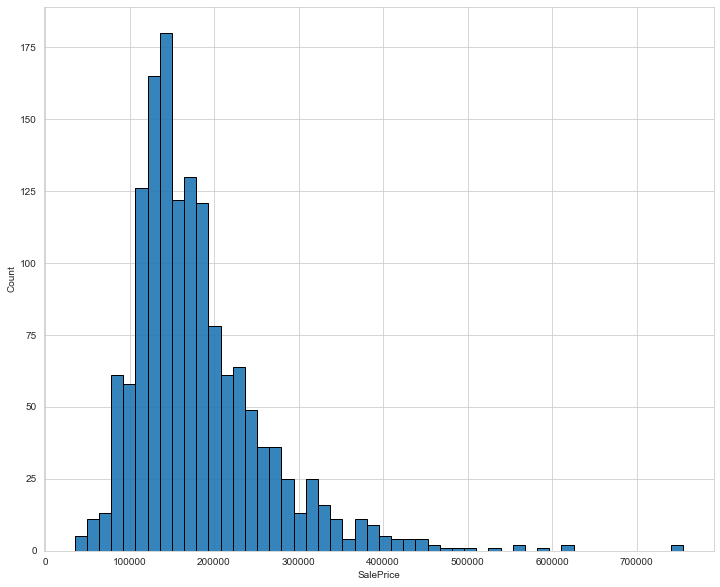

In [25]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.histplot(data=df, x="SalePrice", bins=50,cbar=True,edgecolor='black', alpha = 0.9)
plt.grid(True)
# Como podemos ver grande parte dos preços estão entre $100.000,00 e $200.000,00 dolares.

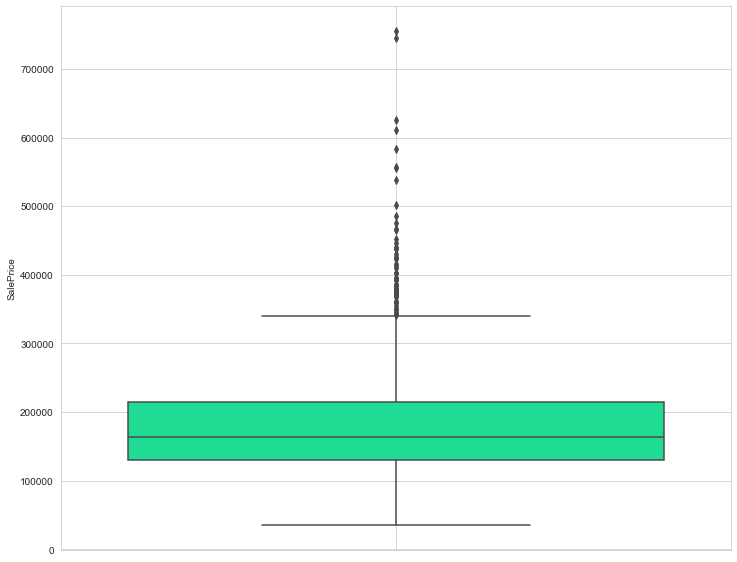

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, y="SalePrice",color="#00FA9A",)
plt.grid(True)

In [16]:
df["SalePrice"].describe() 
# O preço médio é de $180.921,00 dolares e seu desvio padrão de 79.442 (um valor bem alto)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [30]:
df.corr()["SalePrice"].sort_values(ascending=False)
#Aqui, listamos a correlação entre o alvo e outras características, dando um sort da maior correlação até a menor
#Aparentemente a variável "OverallQual" tem a correlação positiva mais alta com nossa variável target

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

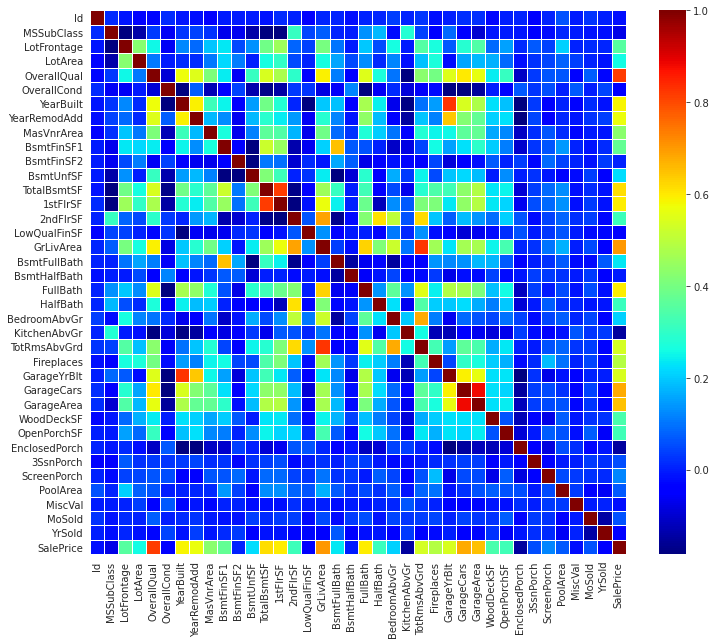

In [163]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="jet",annot=False,linewidths=1,robust=True)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

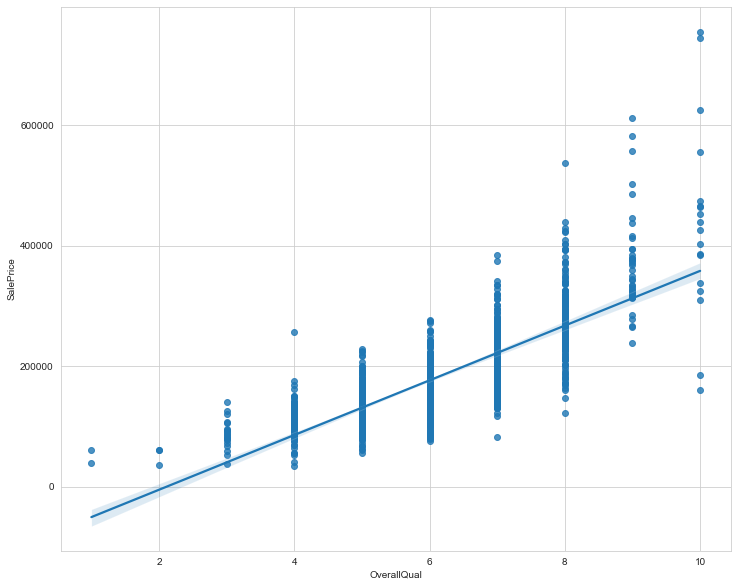

In [31]:
plt.figure(figsize=(12,10))
sns.regplot(x="OverallQual", y="SalePrice",data=df)
# A variável "OverallQual" possui a maior correlação positiva para com a target 

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

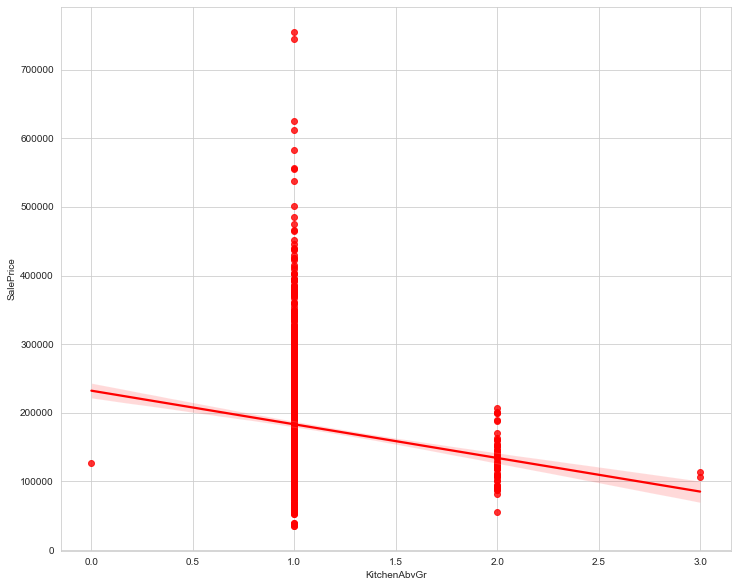

In [32]:
plt.figure(figsize=(12,10))
sns.regplot(x="KitchenAbvGr", y="SalePrice",data=df,color="red")
# A variável "KitchenAbvGr" possui a maior correlação negativa para com a target

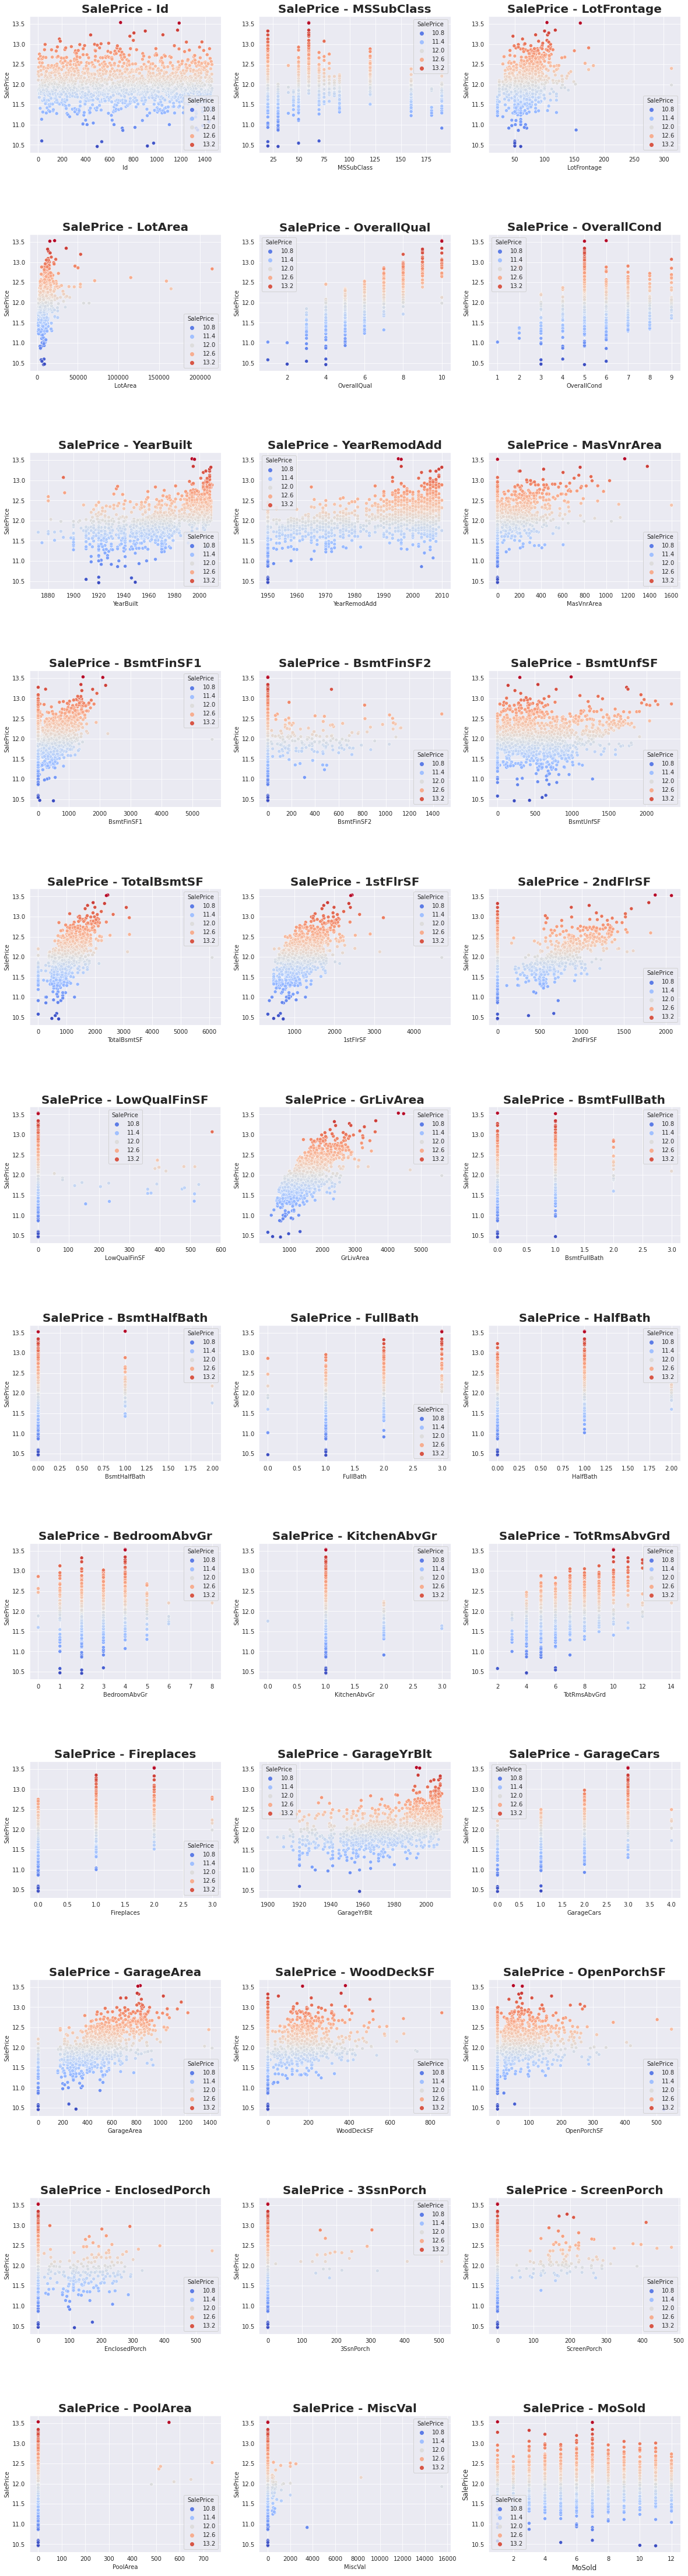

In [166]:
# Visualização de variáveis preditoras numéricas com variáveis de destino 
train_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))

fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

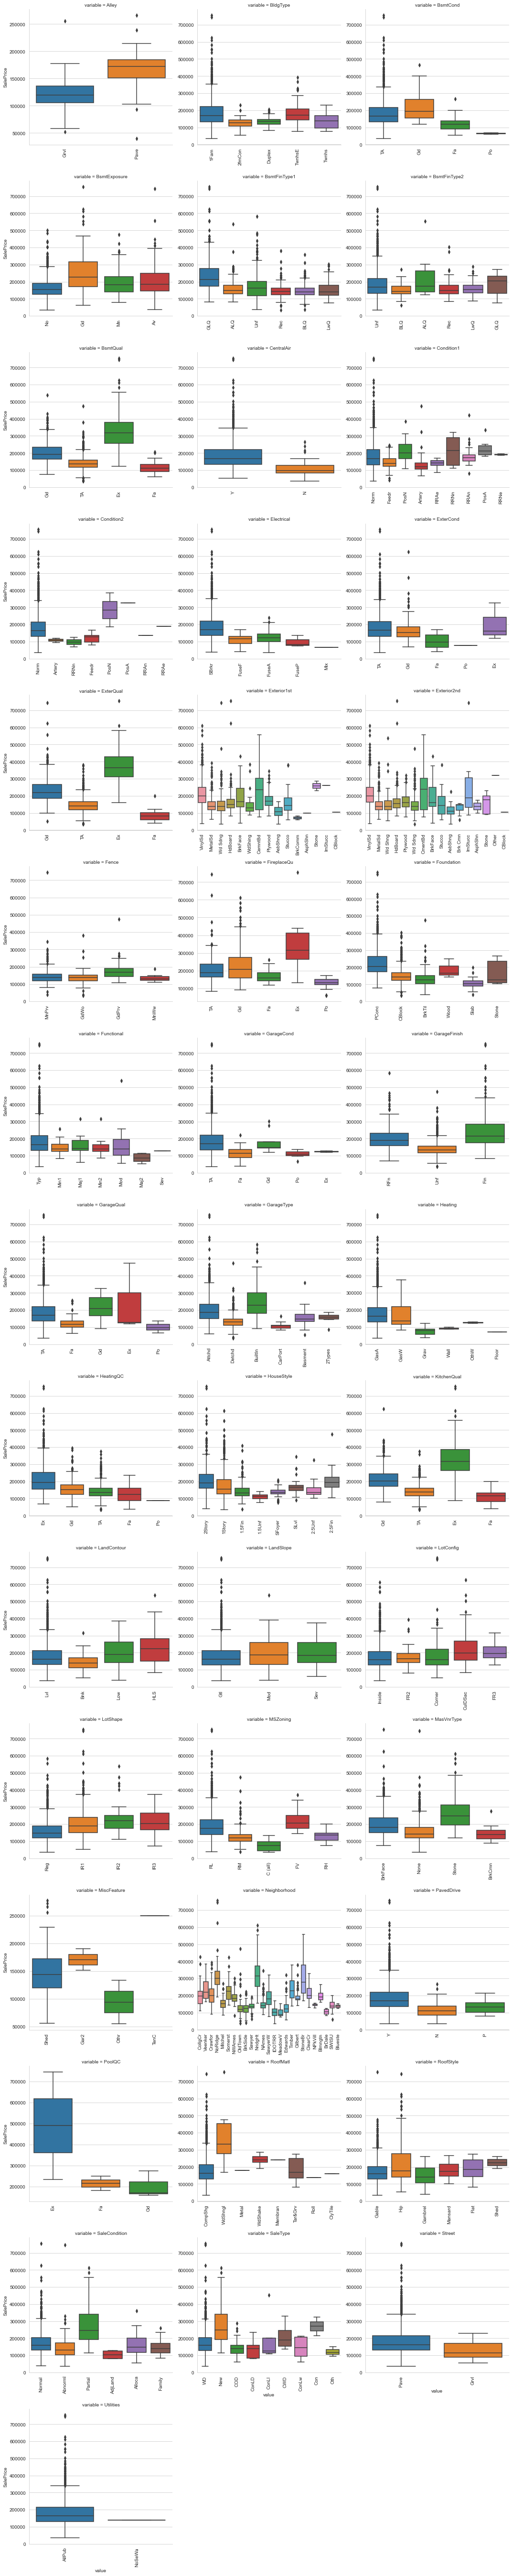

In [35]:
# Visualizando variáveis categóricas correlacionadas com variáveis numéricas
categorical = df.select_dtypes(exclude=['int64','float64'])
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    

f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

## 2. Preparando o dado para aplicar os modelos de Machine Learning

<font color="red">
2.1. Lidando com valores nulos

In [36]:
num_cols=df.columns[df.dtypes!= "object"]
cat_cols=df.columns[df.dtypes== "object"]
test_num_cols=test.columns[test.dtypes!= "object"]
test_cat_cols=test.columns[test.dtypes== "object"]

In [37]:
df[num_cols].isnull().sum().sort_values(ascending=False)
#We have only 3 numerical columns with missing values

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [38]:
test[test_num_cols].isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [39]:
df[num_cols].isnull().sum().sort_values(ascending=False)/len(df)
#Their percentage is not so high and we can fill the missing values

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
Id               0.000000
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
EnclosedPorch    0.000000
HalfBath         0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
MSSubClass       0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float

In [40]:
# Começando com a variável com maior número de valores faltantes dentre as colunas numéricas
df["LotFrontage"].value_counts() #There 110 different types

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [41]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [42]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True) # we fill the missing values with the mean of the column
test["LotFrontage"].fillna(test["LotFrontage"].mean(),inplace=True)
df["LotFrontage"].isnull().sum()

0

In [43]:
test["LotFrontage"].isnull().sum()

0

In [44]:
# Olhando outra variável numérica com valores nulos
df["GarageYrBlt"] 

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [45]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].median(),inplace=True)
print(df["GarageYrBlt"].isnull().sum())
print(test["GarageYrBlt"].isnull().sum())

0
0


In [46]:
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].median(), inplace=True)


In [47]:
df[num_cols].isnull().sum().sort_values(ascending=False)
# Agora não temos mais valores faltantes nas colunas numéricas

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
SalePrice        0
dtype: int64

In [180]:
test[test_num_cols].isnull().sum().sort_values(ascending=False) # Ainda temos valores faltantes, porém uma quantidade muito baixa

BsmtHalfBath     2
BsmtFullBath     2
BsmtFinSF1       1
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
OpenPorchSF      0
EnclosedPorch    0
BedroomAbvGr     0
3SsnPorch        0
ScreenPorch      0
WoodDeckSF       0
PoolArea         0
MiscVal          0
GarageYrBlt      0
MoSold           0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
Id               0
HalfBath         0
FullBath         0
MSSubClass       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
YrSold           0
dtype: int64

In [48]:
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].median(), inplace=True)
test["BsmtFullBath"].fillna(test["BsmtFullBath"].median(), inplace=True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mean(), inplace=True)
test["GarageCars"].fillna(test["GarageCars"].mean(), inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mean(), inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean(), inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean(), inplace=True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mean(), inplace=True)
test[test_num_cols].isnull().sum().sort_values(ascending=False) 
# Lidamos com todas as colunas numéricas no DataFrame de test



Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [50]:
df[cat_cols].isnull().sum().sort_values(ascending=False)/len(df[cat_cols])
# Temos 16 colunas categóricas com valores faltantes

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

In [51]:
test[test_cat_cols].isnull().sum().sort_values(ascending=False)/len(test[test_cat_cols])

PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
GarageCond       0.053461
GarageQual       0.053461
GarageFinish     0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
MasVnrType       0.010966
MSZoning         0.002742
Utilities        0.001371
Functional       0.001371
Exterior2nd      0.000685
KitchenQual      0.000685
SaleType         0.000685
Exterior1st      0.000685
LotShape         0.000000
LandContour      0.000000
PavedDrive       0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Street      

In [52]:
# Iremos dropar colunas que possuem mais de 80% de valores faltantes:
df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 77, dtype: int64

In [53]:
test.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace=True)
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      730
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
                ... 
TotalBsmtSF        0
MSSubClass         0
HeatingQC          0
CentralAir         0
SaleCondition      0
Length: 76, dtype: int64

In [54]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [55]:
df["FireplaceQu"].fillna("Gd",inplace=True)
df["FireplaceQu"].isnull().sum()

0

In [56]:
test["FireplaceQu"].fillna("Gd",inplace=True)
test["FireplaceQu"].isnull().sum()

0

In [57]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [58]:
df["GarageType"].fillna("Attchd",inplace=True) # Vamos preencher os valores faltantes com o valor mais comum


In [59]:
test["GarageType"].fillna("Attchd",inplace=True)

In [60]:
df["GarageFinish"].fillna("Unf",inplace=True)
test["GarageFinish"].fillna("Unf",inplace=True)

In [61]:
df["GarageCond"].fillna("TA",inplace=True)
test["GarageCond"].fillna("TA",inplace=True)

In [62]:
df["GarageQual"].fillna("TA",inplace=True)
test["GarageQual"].fillna("TA",inplace=True)


In [63]:
df.isnull().sum().sort_values(ascending=False) # O resto dos valores faltantes são tão poucos que agora podemos apenas dropá-los

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
                ..
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
SalePrice        0
Length: 77, dtype: int64

In [64]:
df["BsmtFinType2"].fillna("Unf",inplace=True)

In [65]:
df["BsmtExposure"].fillna("No",inplace=True)

In [66]:
df["BsmtFinType1"].fillna("Unf",inplace=True)

In [67]:
df["BsmtQual"].fillna("TA",inplace=True)

In [68]:
df["BsmtCond"].fillna("TA",inplace=True)

In [69]:
df["MasVnrType"].fillna("None",inplace=True)

In [70]:
df["Electrical"].fillna("SBrkr",inplace=True)

In [73]:
df.isnull().sum().sort_values(ascending=False) # Agora não temos nenhum valore faltante em nosso conjunto de treino

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

In [74]:
test.isnull().sum().sort_values(ascending=False)

BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
                 ..
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 76, dtype: int64

In [75]:
test["BsmtCond"].fillna("TA",inplace=True)
test["BsmtQual"].fillna("TA",inplace=True)
test["BsmtExposure"].fillna("No",inplace=True)
test["BsmtFinType2"].fillna("Unf",inplace=True)
test["BsmtFinType1"].fillna("GLQ",inplace=True)
test.isnull().sum().sort_values(ascending=False)

MasVnrType       16
MSZoning          4
Functional        2
Utilities         2
Exterior2nd       1
                 ..
Foundation        0
ExterCond         0
ExterQual         0
MasVnrArea        0
SaleCondition     0
Length: 76, dtype: int64

In [76]:
test["MasVnrType"].fillna("None",inplace=True)
test["MSZoning"].fillna("RL",inplace=True)
test["Functional"].fillna("No",inplace=True)
test["Utilities"].fillna("AllPub",inplace=True)
test["Exterior2nd"].fillna("VinylSd",inplace=True)
test.isnull().sum().sort_values(ascending=False)
#We have still 3 columns with only 1 missing value

SaleType         1
Exterior1st      1
KitchenQual      1
Id               0
FullBath         0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
RoofMatl         0
SaleCondition    0
Length: 76, dtype: int64

In [77]:
test["KitchenQual"].fillna("TA",inplace=True)
test["Exterior1st"].fillna("VinylSd",inplace=True)
test["SaleType"].fillna("WD",inplace=True)
test.isnull().sum().sort_values(ascending=False)
# Pronto, agora não temos dados nulos no conjunto de teste também :)

Id               0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 76, dtype: int64

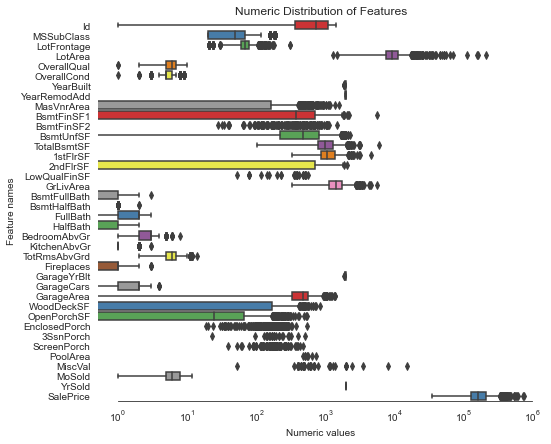

In [78]:
# Criando box plots para todas as colunas numéricas
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [79]:
# importando o Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


In [80]:
# Detectando colunas numéricas enviesadas:
skew_columns = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("Temos {} features numericas com um desvio acima de > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

 Temos 27 features numericas com um desvio acima de > 0.5 :


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.382499
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

In [81]:
# Vamos normalizar essas features enviesadas
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

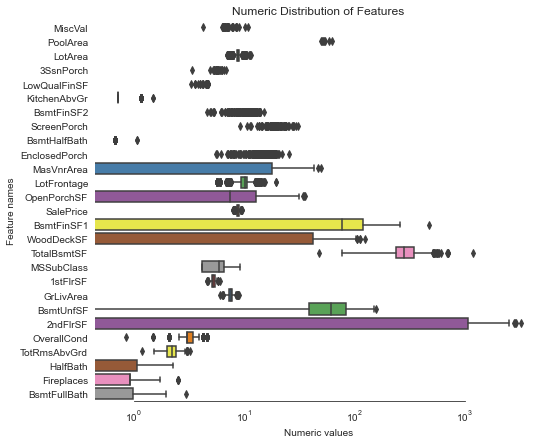

In [82]:
# Fazendo mais um box plot para termos certeza de que as colunas numéricas distorcidas foram corrigidas
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)
# Agora todas as colunas numéricas parecem estar boas

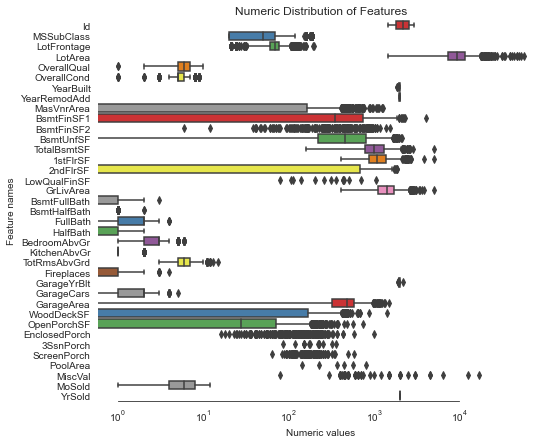

In [83]:
# Fazendo a mesma operação ao conjunto de teste:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=test[test_num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [85]:
# Identificando colunas numéricas com um desvio acima de 0.5
skew_columns = test[test_num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("Temos {} features numericas com um desvio acima de > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

Temos 25 features numericas com um desvio acima de > 0.5 :


PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
BsmtFinSF2        4.038570
ScreenPorch       3.784349
BsmtHalfBath      3.779085
LotArea           3.112013
OpenPorchSF       2.685015
MasVnrArea        2.546947
WoodDeckSF        2.128569
1stFlrSF          1.556592
MSSubClass        1.345305
BsmtFinSF1        1.164876
GrLivArea         1.129240
BsmtUnfSF         0.919285
2ndFlrSF          0.911944
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
TotalBsmtSF       0.813031
LotFrontage       0.719448
HalfBath          0.713993
BsmtFullBath      0.651195
OverallCond       0.448703
BedroomAbvGr      0.436174
GarageArea        0.300033
FullBath          0.295534
MoSold            0.182834
OverallQual       0.181010
YrSold            0.168813
Id                0.000000
GarageCars       -0.107068
GarageYrBlt      -0.170538
YearRemodAdd     -0.399495
YearBuilt        -0.587052
d

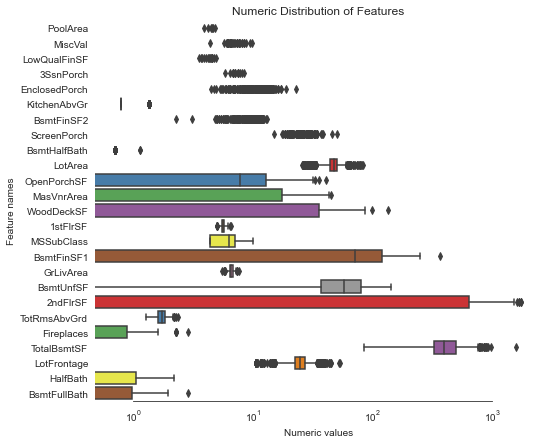

In [86]:
# Normalizando essas features numéricas
for i in skew_index:
    test[i] = boxcox1p(test[i], boxcox_normmax(test[i] + 1))
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=test[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)
# Agora todas elas parecem estar normalmente distribuidas

In [87]:
df["SalePrice"]

0       8.934126
1       8.862747
2       8.969681
3       8.727666
4       9.026742
          ...   
1455    8.843886
1456    8.937801
1457    9.059134
1458    8.735557
1459    8.754973
Name: SalePrice, Length: 1460, dtype: float64

<font color= "red">
2.3. Lidando com as colunas categóricas em geral:

In [88]:
cat_cols=df.columns[df.dtypes== "object"]
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [89]:
test_cat_cols = test.columns[test.dtypes=="object"]
test_cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
df[cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [91]:
df= pd.get_dummies(df,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                'RoofStyle',  'MasVnrType', 'ExterQual', 
                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
df.head() # Agora dumificamos todas as colunas categóricas, fazendo com que todas fiquem colunadas de forma binária

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6.281283,9.826839,8.670457,AllPub,Norm,2Story,7,3.036931,2003,...,0,0,0,0,1,0,0,0,1,0
1,2,4.146687,10.795703,8.787629,AllPub,Norm,1Story,6,4.241668,1976,...,0,0,0,0,1,0,0,0,1,0
2,3,6.281283,10.031075,8.933084,AllPub,Norm,2Story,7,3.036931,2001,...,0,0,0,0,1,0,0,0,1,0
3,4,6.622580,9.472852,8.782836,AllPub,Norm,2Story,7,3.036931,1915,...,0,0,0,0,1,0,0,0,0,0
4,5,6.281283,11.034378,9.150118,AllPub,Norm,2Story,8,3.036931,2000,...,0,0,0,0,1,0,0,0,1,0


In [92]:
df.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 'HouseStyle',
         'RoofMatl', 'Exterior1st',  'Heating', 'Electrical', 'Functional', 
        'GarageQual'],axis=1,inplace=True) # Dropando 3 colunas que possuem a mesma informação
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6.281283,9.826839,8.670457,7,3.036931,2003,2003,19.340340,118.098015,...,0,0,0,0,1,0,0,0,1,0
1,2,4.146687,10.795703,8.787629,6,4.241668,1976,1976,0.000000,147.125761,...,0,0,0,0,1,0,0,0,1,0
2,3,6.281283,10.031075,8.933084,7,3.036931,2001,2002,17.687638,91.750448,...,0,0,0,0,1,0,0,0,1,0
3,4,6.622580,9.472852,8.782836,7,3.036931,1915,1970,0.000000,52.861356,...,0,0,0,0,1,0,0,0,0,0
4,5,6.281283,11.034378,9.150118,8,3.036931,2000,2000,25.266441,112.267323,...,0,0,0,0,1,0,0,0,1,0


In [93]:
df.info() # Agora todas as colunas são numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, Id to SaleCondition_Partial
dtypes: float64(28), int64(10), uint8(125)
memory usage: 611.8 KB


In [94]:
# Fazendo a mesma operação ao conjunto de teste
test[test_cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [95]:
test= pd.get_dummies(test,columns =["MSZoning","Street","LotShape","LandContour",'LandSlope', 
                                    'LotConfig','Neighborhood', 'Condition1', 'BldgType', 
                                    'RoofStyle',  'MasVnrType', 'ExterQual', 
                                    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                    'BsmtFinType1', 'HeatingQC', 'CentralAir', 
                                    'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first =True)
test.head() # Transformando todas as colunas categóricas em numéricas, dumificando-as novamente

,Id,MSSubClass,LotFrontage,LotArea,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.346649,27.830488,50.728200,AllPub,Norm,1Story,5,6,1961,...,0,0,0,0,1,0,0,0,1,0
1,1462,4.346649,28.076418,54.118583,AllPub,Norm,1Story,6,6,1958,...,0,0,0,0,1,0,0,0,1,0
2,1463,6.707527,26.333965,53.590854,AllPub,Norm,2Story,5,5,1997,...,0,0,0,0,1,0,0,0,1,0
3,1464,6.707527,27.335702,48.336774,AllPub,Norm,2Story,6,6,1998,...,0,0,0,0,1,0,0,0,1,0
4,1465,8.545975,17.864756,38.773082,AllPub,Norm,1Story,8,5,1992,...,0,0,0,0,1,0,0,0,1,0


In [96]:
test.drop(["Exterior2nd","Condition2","BsmtFinType2","Utilities", 
           'HouseStyle', 'RoofMatl', 'Exterior1st',  'Heating', 
           'Electrical', 'Functional', 'GarageQual'],axis=1,inplace=True) # Dropando 3 colunas que possuem a mesma informação novamente
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.346649,27.830488,50.728200,5,6,1961,1961,0.000000,87.054272,...,0,0,0,0,1,0,0,0,1,0
1,1462,4.346649,28.076418,54.118583,6,6,1958,1958,14.470534,137.226186,...,0,0,0,0,1,0,0,0,1,0
2,1463,6.707527,26.333965,53.590854,5,5,1997,1998,0.000000,123.768695,...,0,0,0,0,1,0,0,0,1,0
3,1464,6.707527,27.335702,48.336774,6,6,1998,1998,6.113887,103.082894,...,0,0,0,0,1,0,0,0,1,0
4,1465,8.545975,17.864756,38.773082,8,5,1992,1992,0.000000,59.033343,...,0,0,0,0,1,0,0,0,1,0


In [97]:
test.info() # Agora todas as colunas são numéricas e estão tratadas, tanto do conjunto de treino, quanto do de teste, podemos prosseguir para os modelos!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 162 entries, Id to SaleCondition_Partial
dtypes: float64(28), int64(9), uint8(125)
memory usage: 600.0 KB


In [98]:
# Dropando a coluna ID, tendo em vista que não a utilizaremos
df.drop("Id",axis=1,inplace=True)
df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.281283,9.826839,8.670457,7,3.036931,2003,2003,19.340340,118.098015,0.0,...,0,0,0,0,1,0,0,0,1,0
1,4.146687,10.795703,8.787629,6,4.241668,1976,1976,0.000000,147.125761,0.0,...,0,0,0,0,1,0,0,0,1,0
2,6.281283,10.031075,8.933084,7,3.036931,2001,2002,17.687638,91.750448,0.0,...,0,0,0,0,1,0,0,0,1,0
3,6.622580,9.472852,8.782836,7,3.036931,1915,1970,0.000000,52.861356,0.0,...,0,0,0,0,1,0,0,0,0,0
4,6.281283,11.034378,9.150118,8,3.036931,2000,2000,25.266441,112.267323,0.0,...,0,0,0,0,1,0,0,0,1,0


In [99]:
test_id = test["Id"]
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [100]:
test.drop("Id",axis=1,inplace=True)
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.346649,27.830488,50.728200,5,6,1961,1961,0.000000,87.054272,7.328389,...,0,0,0,0,1,0,0,0,1,0
1,4.346649,28.076418,54.118583,6,6,1958,1958,14.470534,137.226186,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,6.707527,26.333965,53.590854,5,5,1997,1998,0.000000,123.768695,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,6.707527,27.335702,48.336774,6,6,1998,1998,6.113887,103.082894,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,8.545975,17.864756,38.773082,8,5,1992,1992,0.000000,59.033343,0.000000,...,0,0,0,0,1,0,0,0,1,0


## 2.3. Selecionando e treinando o modelo:

In [101]:
X = df.drop("SalePrice",axis=1)
X = X.values
X.shape

(1460, 161)

In [102]:
y.shape

(1460,)

In [103]:
test= test.values
test.shape

(1459, 161)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.05,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1387, 161)
(73, 161)
(1387,)
(73,)


In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)

In [106]:
# Identificando de cara os resultados das métricas mais importantes para um problema de regressão
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))

15703.051284413792
499972486.82427025
22360.064553222343


<AxesSubplot:>

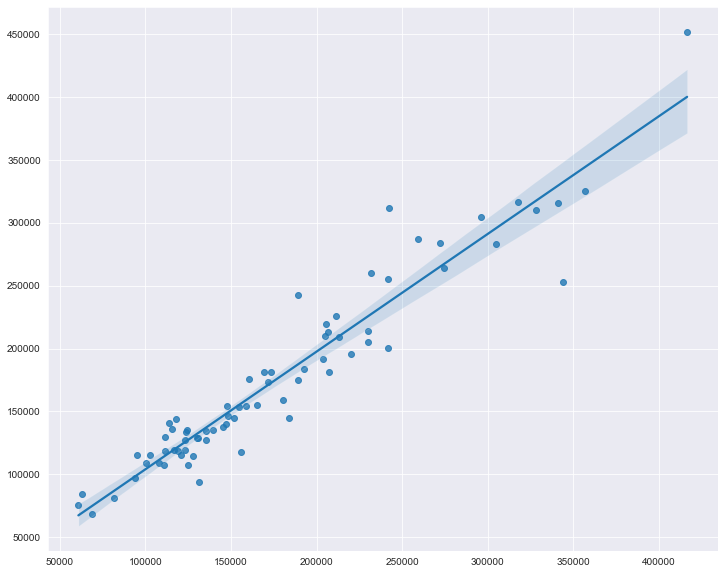

In [109]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.regplot(predictions1,y_test)

<font color="red">
Vamos para outro modelo

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
predictions2 = dtree.predict(X_test)
print(mean_absolute_error(y_test,predictions2))
print(mean_squared_error(y_test,predictions2))
print(np.sqrt(mean_squared_error(y_test,predictions2))) 

23754.712328767124
1498781775.9452055
38714.103062646376


In [111]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.12 %
Standard Deviation: 15.78 %


<font color="red">
Vamos para outro:

In [112]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
predictions_rforest= random_forest.predict(X_test)
print(mean_absolute_error(y_test,predictions_rforest))
print(mean_squared_error(y_test,predictions_rforest))
print(np.sqrt(mean_squared_error(y_test,predictions_rforest)))

14367.52397260274
596693160.4932315
24427.303586217444


In [116]:
accuracies = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# Aparentemente o random forest possui um ótimo resultado. Vamos passar para mais alguns

Accuracy: 85.69 %
Standard Deviation: 7.66 %


<font color="red">
Indo para outros modelos:

In [115]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [ 100,120,150], 'max_features': [ 12,14,16]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(-best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 84047724988.67 %
Best Parameters: {'max_features': 16, 'n_estimators': 150}


In [242]:
grid_predictions = grid_search.predict(X_test)
print(mean_absolute_error(y_test,grid_predictions))
print(mean_squared_error(y_test,grid_predictions))
print(np.sqrt(mean_squared_error(y_test,grid_predictions))) # As predições estão bem próximas ao random forest

14333.342465753425
613375807.3001012
24766.425000393196


<font color="red">
Vamos utilizar outros modelos com método ensemble e de boost para vermos se conseguimos melhores resultados

In [121]:
# Importando alguns outros modelos

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score

In [244]:
kfold= KFold(n_splits=11,random_state=42,shuffle=True) #kfold cross validation

Light Gradient Boosting Regressor:

O Gradient Boosting se refere a uma classe de algoritmos de aprendizado de máquina de conjunto que podem ser usados para problemas de modelagem preditiva de classificação ou regressão.

Os conjuntos são construídos a partir de modelos de árvore de decisão. As árvores são adicionadas uma de cada vez ao conjunto e ajustadas para corrigir os erros de previsão feitos pelos modelos anteriores. Esse é um tipo de modelo de aprendizado de máquina de conjunto conhecido como boosting.

In [122]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [123]:
lightgbm.fit(X_train,y_train)
lightgbm_predictions = lightgbm.predict(X_test)
print(mean_absolute_error(y_test,lightgbm_predictions))
print(mean_squared_error(y_test,lightgbm_predictions))
print(np.sqrt(mean_squared_error(y_test,lightgbm_predictions))) 
# Ele foi melhor que ambos de seus "irmãos" Random Forest and Grid Search Results

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
15471.906770042568
607955399.8333373
24656.7516074875


In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# Utilizando Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.00015))

In [125]:
svr.fit(X_train,y_train)
svr_predictions= svr.predict(X_test)
print(mean_absolute_error(y_test,svr_predictions))
print(mean_squared_error(y_test,svr_predictions))
print(np.sqrt(mean_squared_error(y_test,svr_predictions)))

57509.60840921852
5647874066.634803
75152.33906296465


<font color="red">
Vamos testar o XGBoost:

In [126]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [127]:
xgboost.fit(X_train, y_train)
xgboost_predictions =xgboost.predict(X_test)

In [128]:
print(mean_absolute_error(y_test,xgboost_predictions))
print(mean_squared_error(y_test,xgboost_predictions))
print(np.sqrt(mean_squared_error(y_test,xgboost_predictions)))

13126.200074914384
477756177.46334565
21857.634306194843


<font color="red">
Vamos testar o GradientBoostingRegressor:

In [129]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

In [130]:
gbr.fit(X_train,y_train)
gbr_predictions = gbr.predict(X_test)
print(mean_absolute_error(y_test,gbr_predictions))
print(mean_squared_error(y_test,gbr_predictions))
print(np.sqrt(mean_squared_error(y_test,gbr_predictions))) 

14215.870832558108
516885763.8384172
22735.121812702415


Ok, agora vamos testar algumas ANNs (Artificial neural network):

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [137]:
rs=RobustScaler()

In [138]:
X_deep_train=rs.fit_transform(X_train)
X_deep_train

array([[ 0.52958038, -0.55034641, -0.24774398, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70468602,  1.39135458,  0.71667979, ...,  0.        ,
        -1.        ,  1.        ],
       [ 0.81278243,  0.        , -2.79604617, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.70468602, -0.55034641, -0.35179714, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.84592121, -0.5086142 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81278243, -0.96886517, -2.22129396, ...,  0.        ,
         0.        ,  0.        ]])

In [139]:
X_deep_test =rs.transform(X_test)
X_deep_test

array([[-0.70468602, -0.00260865, -0.28357768, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1574659 ,  1.30739868,  0.59399996, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41021415, -0.78549811, -0.13666642, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52958038, -0.32483795, -0.70796326, ...,  0.        ,
        -1.        ,  0.        ],
       [-0.70468602, -0.84592121, -0.32958886, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70468602,  0.35207249, -0.23438003, ...,  0.        ,
         0.        ,  0.        ]])

In [140]:
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1))
# Compilando o modelo
model.compile(loss='mean_squared_error', optimizer="adam")



model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=10)


Epoch 1/100
139/139 [==============================] - 1s 1ms/step - loss: 17303961600.0000
Epoch 2/100
139/139 [==============================] - 0s 1ms/step - loss: 4628407808.0000
Epoch 3/100
139/139 [==============================] - 0s 1ms/step - loss: 3999046912.0000
Epoch 4/100
139/139 [==============================] - 0s 1ms/step - loss: 3367864832.0000
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 2778532096.0000
Epoch 6/100
139/139 [==============================] - 0s 1ms/step - loss: 2389582080.0000
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 2193748224.0000
Epoch 8/100
139/139 [==============================] - 0s 1ms/step - loss: 2134851584.0000
Epoch 9/100
139/139 [==============================] - 0s 1ms/step - loss: 2081853952.0000
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 2130331776.0000
Epoch 11/100
139/139 [==============================] - 0s 1ms/step - loss: 2066409344.0

In [141]:
deep_predictions=model.predict(X_test)

In [142]:
print(mean_absolute_error(y_test,deep_predictions))
print(mean_squared_error(y_test,deep_predictions))
print(np.sqrt(mean_squared_error(y_test,deep_predictions)))

20706.807363013697
973902132.7262849
31207.405094404836


In [144]:
submission_sample = pd.read_csv("sample_submission.csv")
submission_sample.shape

(1459, 2)

In [145]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,7.202598,9.472852,8.680621,3.0,2.576130,1950.0,1950.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4.146687,11.923304,9.059771,9.0,3.036931,2009.0,2010.0,35.813720,252.823710,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.903776,10.167396,7.678791,6.0,3.036931,1996.0,1997.0,0.000000,149.648797,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6.281283,10.915958,8.773369,8.0,3.036931,1997.0,1998.0,27.536494,156.703017,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6.281283,11.710022,8.873498,7.0,3.036931,1993.0,1994.0,33.426006,166.286062,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,4.146687,10.673539,8.760163,6.0,3.036931,2006.0,2006.0,0.000000,11.347082,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1383,5.891414,9.826839,8.597354,4.0,2.071043,1928.0,1950.0,0.000000,108.414107,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1384,4.146687,9.472852,8.639714,5.0,3.863872,1955.0,1990.0,0.000000,44.323821,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1385,5.891414,9.099832,8.578064,7.0,4.241668,1918.0,1998.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [146]:
def latest_predictions(features): 
    return ((0.025* elasticnet.predict(features)) + \
            (0.025 * lasso.predict(features)) + \
            (0.025 * random_forest.predict(features)) + \
            (0.025* svr.predict(features)) + \
            (0.62 * gbr.predict(features)) + \
            (0.03 * xgboost.predict(features)) + \
            (0.03 * lightgbm.predict(features)) + \
            (0.22 * stack_reg.predict(np.array(features))))

In [148]:
q1 = submission_sample['SalePrice'].quantile(0.005)
q2 = submission_sample['SalePrice'].quantile(0.995)
submission_sample['SalePrice'] = submission_sample['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission_sample['SalePrice'] = submission_sample['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)


In [149]:
# Jogando os resultados para um CSV

submission_sample.to_csv("new_submission_regression4.csv", index=False)

<br>

<hr>